In [36]:
import torch
import pickle
import gzip
import matplotlib.pyplot as plt
from torch import nn
import numpy as np

In [37]:
file = gzip.open("mnist.pkl.gz")
((x_train, y_train), (x_valid, y_valid), _ )=pickle.load(file, encoding='latin-1')

In [38]:
x_train = torch.tensor(x_train).float()
x_valid = torch.tensor(x_valid).float()
y_train = torch.tensor(y_train).long()
y_valid = torch.tensor(y_valid).long()

In [39]:
class MySimpleNN(torch.nn.Module):   # MySimpleNN erbt von torch.nn.Module

     # Konstruktor
    def __init__(self, input_size=784, hidden_size=(500, 700, 10), output_size=10):
        # Aufruf des Superkonstruktors von torch.nn.Module
        super(MySimpleNN, self).__init__()
        # Definition der Schichten

        # fc1 --> fully connected layer 1 von 12 auf 70 Neuronen
        # warum 12? --> 12 Features
        self.fc1 = torch.nn.Linear(input_size, hidden_size[0])
        # fc2 --> fully connected layer 2
        self.fc2 = torch.nn.Linear(hidden_size[0], hidden_size[1])
        # fc3 --> fully connected layer 3
        self.fc3 = torch.nn.Linear(hidden_size[1], hidden_size[2])
        # fc4 --> fully connected layer 4
        
        self.fc4 = torch.nn.Linear(hidden_size[2], output_size)

        # Batch Normalization
        # 70, 120, 30 sind die Anzahl der Neuronen in den Schichten
        self.bn1 = torch.nn.BatchNorm1d(hidden_size[0])
        self.bn2 = torch.nn.BatchNorm1d(hidden_size[1])
        self.bn3 = torch.nn.BatchNorm1d(hidden_size[2])


    # forward Methode -> Forward Propagation
    # wenn ich später ein Objekt von MySimpleNN erzeuge, dann kann ich
    # dieses Objekt mit einem Tensor aufrufen, dann wird die forward Methode
    # aufgerufen. z.B. model(x_train)
    def forward(self, xb):   # xb steht für eine Batch von X-Werten
        #print("xb", xb.shape)
        z2 = self.fc1(xb)  # dahinter steckt x@w1 + b1
        a2 = torch.relu(z2)    # alle negativen Werte werden auf 0 gesetzt, der Rest bleibt
        #print("a2", a2.shape)
        a2_bn = self.bn1(a2) # Normalisierung der Werte auf den Neuronen
        #print("a2_bn", a2_bn.shape)
        z3 = self.fc2(a2_bn) # dahinter steckt a2@w2 + b2
        #print("z3", z3.shape)
        a3 = torch.relu(z3)
        #print("a3", a3.shape)
        a3_bn = self.bn2(a3)
        #print("a3_bn", a3_bn.shape)
        z4 = self.fc3(a3_bn)
        #print("z4", z4.shape)
        a4 = torch.relu(z4)
        #print("a4", a4.shape)
        a4_bn = self.bn3(a4)
        #print("a4_bn", a4_bn.shape)
        y_hat = torch.relu(self.fc4(a4_bn))
        #print("y_hat", y_hat.shape)
        return y_hat

In [40]:
def get_batch(x, y, batch_size):
    for i in range(0, len(x), batch_size):
        # yield: gibt den Wert zurück, aber merkt sich den aktuellen Zustand
        yield x[i:i+batch_size], y[i:i+batch_size]

In [41]:
xb , yb = next(get_batch(x_train, y_train, 10))
model = MySimpleNN()
print(model(xb))

tensor([[0.1603, 0.0000, 0.5329, 0.2310, 0.9964, 0.0000, 0.5535, 0.0000, 0.0000,
         0.4238],
        [0.3157, 0.5215, 0.0000, 1.2364, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.3126, 0.5739, 0.0000, 0.0000, 0.8331, 0.6473, 0.0000, 0.1617, 0.0000,
         0.0000],
        [1.2534, 0.4011, 1.3935, 0.2249, 0.0000, 0.0000, 0.0000, 0.5223, 0.8153,
         0.7156],
        [0.0872, 0.0406, 0.1186, 0.0714, 0.1220, 0.0000, 0.2210, 0.0000, 0.0000,
         0.8969],
        [0.0000, 0.0000, 0.0000, 0.0382, 0.0027, 0.0000, 0.2340, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.2905, 0.0482, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.8621,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.7108, 0.0000, 0.0552, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.4074, 0.0000, 0.2472, 0.0000, 0.0000, 0.0000, 0.2136, 0.4498, 0.4013,
         1.2472],
        [0.1436, 0.5436, 0.0000, 0.0000, 0.0000, 0.7405, 0.0000, 0.0000, 0.0840,
         0.0000]], grad_fn=<

Epoch:  0 Loss:  0.005440594935417175 LR:  0.0001
Epoch:  10 Loss:  0.0004885121419280768 LR:  0.0001
Epoch:  20 Loss:  0.00012913090280257167 LR:  0.0001
Epoch:  30 Loss:  5.22191101720091e-05 LR:  0.0001
Epoch:  40 Loss:  2.7059253493716825e-05 LR:  0.0001


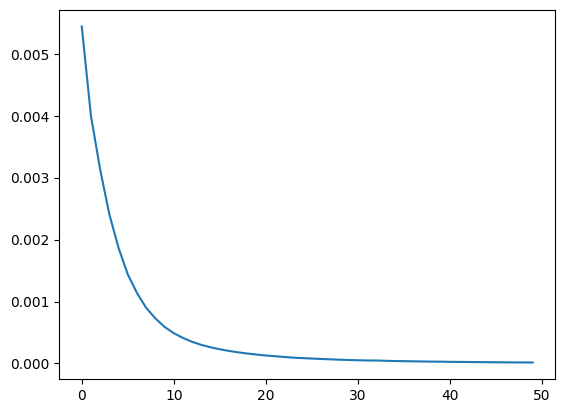

In [43]:
# eigenes Modell wird erstellt
model = MySimpleNN()
lr=0.0001
# trainiere immer mit 256 Datensätzen auf einmal
batch_size=256

# loss function
# die Lossfunction von Pytorch müssen erstmal erstellt werden mit ()
loss_fn = nn.CrossEntropyLoss()

# Optimizer
# Adam Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=lr)


optimizer = torch.optim.Adam(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min',factor=0.1, patience=10)

def train(xb, yb):
    y_hat=model(xb)
    loss = loss_fn(y_hat, yb)
    loss.backward()
    optimizer.step()
    return loss.item()

losses=[]
# import tqdm notebook
for epoch in (range(50)):
    loss_sum=0
    # Iteration über alle Batches
    for xb, yb in get_batch(x_train, y_train, batch_size):
        loss_sum += train(xb, yb)
    loss_epoch = loss_sum/len(x_train)
    losses.append(loss_sum/len(x_train))
    scheduler.step(loss_epoch)
    if epoch % 10 == 0:
        print("Epoch: ", epoch, "Loss: ", loss_epoch, "LR: ", optimizer.param_groups[0]['lr'])

#plot
import matplotlib.pyplot as plt
plt.plot(losses)

3

# Überlegungen zur Netzarchitektur

InputNeuronen: 784
OutputNeuronen: 10

    - Neuron 0 --> wenn der Wert hier am höchsten ist. Dann soll es eine 0 sein
    - Neuron 1 --> wenn der Wert hier am höchsten ist. Dann soll es eine 1 sein
    - Neuron 2 --> wenn der Wert hier am höchsten ist. Dann soll es eine 2 sein
    - Neuron 3 --> wenn der Wert hier am höchsten ist. Dann soll es eine 3 sein
    ...
